In [8]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

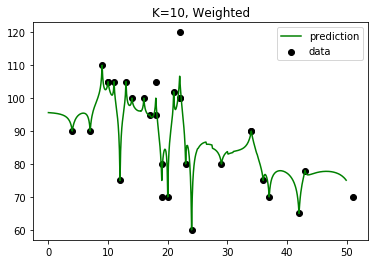

In [16]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]
np.append(T, np.arange(0, 50, 0.1)[:, np.newaxis], axis=0)

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [14]:
from sklearn import linear_model
# Using Linear Regression method (OLS)
# Instantiate and fit our model.
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
X = music[['loudness']].values.tolist()
Y = music['bpm'].values.tolist()
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

#X_trans = X[['Population','Population**2','Larceny', 'Auto']].values
#X_trans = X_trans*0.5
predicted_trans = regr.predict(X).ravel()
actual = music['bpm']

# Calculate the error, also called the residual.
residual_trans = actual - predicted_trans


Coefficients: 
 [-0.73257558]

Intercept: 
 105.3767386274061

R-squared:
0.3004484565947241


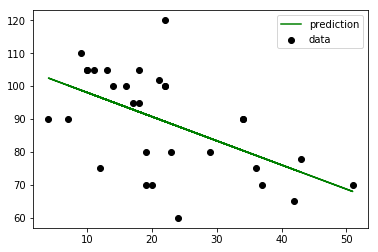

In [15]:
plt.scatter(X, Y, c='k', label='data')
plt.plot(X, predicted_trans, c='g', label='prediction')
plt.legend()
plt.show()

Amazingly the two regression calculations (OLD and KNN) produce very similar results though in the OLD model the R-Squared is low. The KNN with weightage is a better fit for our regression.